In [3]:
#!pip3 install googletrans==3.1.0a0
import os
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
import numpy as np
from autocorrect import Speller
from googletrans import Translator, constants
from matplotlib import pyplot as plt
import re
from nltk.corpus import stopwords
from nltk import pos_tag
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import numpy as geek
#import researchpy as rp
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from itertools import cycle
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from textblob import TextBlob
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vahid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vahid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vahid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vahid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Vahid\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Bayes Multi-Classification

In [4]:
mnb = MultinomialNB()

In [5]:
iris = datasets.load_iris()
  
# X -> features, y -> label
X = iris.data
y = iris.target
  
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4,random_state = 0)  
bayes = mnb.fit(X_train, y_train)
y_pred = bayes.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 2, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2])

# Hard-Classifier Performance Evaluation

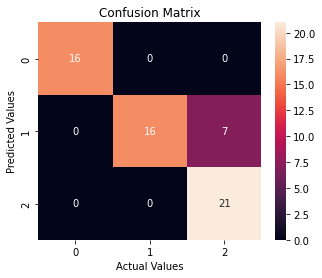

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.70      0.82        23
           2       0.75      1.00      0.86        21

    accuracy                           0.88        60
   macro avg       0.92      0.90      0.89        60
weighted avg       0.91      0.88      0.88        60



In [6]:
cf_matrix=confusion_matrix(y_test,y_pred)

cm_df = pd.DataFrame(cf_matrix,
                     index = ['0','1','2'], 
                     columns = ['0','1','2'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.show()


print(classification_report(y_test, y_pred))

# Soft-Classifier Performance Evaluation

In [7]:
# Generate class membership probabilities
y_preb_probs = mnb.predict_proba(X_test)
y_preb_probs

array([[0.00783661, 0.41867487, 0.57348853],
       [0.08855967, 0.47074124, 0.44069909],
       [0.85679748, 0.09472119, 0.04848132],
       [0.01094811, 0.45808573, 0.53096616],
       [0.7595699 , 0.15142652, 0.08900358],
       [0.00518724, 0.41755658, 0.57725618],
       [0.77171454, 0.14407695, 0.08420851],
       [0.05311295, 0.48318089, 0.46370615],
       [0.04873511, 0.48297385, 0.46829104],
       [0.08487268, 0.47345103, 0.4416763 ],
       [0.02094324, 0.45977954, 0.51927722],
       [0.06093764, 0.48022942, 0.45883294],
       [0.0593658 , 0.47721607, 0.46341813],
       [0.04623285, 0.47706127, 0.47670588],
       [0.04803415, 0.47436426, 0.47760159],
       [0.81132726, 0.12085781, 0.06781493],
       [0.04746142, 0.47140607, 0.48113251],
       [0.05816131, 0.46741805, 0.47442065],
       [0.69253167, 0.18822443, 0.1192439 ],
       [0.80105375, 0.12801699, 0.07092926],
       [0.01536465, 0.43870254, 0.54593281],
       [0.04627957, 0.46674321, 0.48697721],
       [0.

In [8]:
y_valid = pd.DataFrame(y_test)
onehotencoder = OneHotEncoder()
y_valid = onehotencoder.fit_transform(y_valid).toarray()
y_valid

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0

In [9]:
Entropy1 = -sum([np.dot(y_valid[i], np.log2(y_preb_probs[i])) for i in range(len(y_preb_probs))])
Entropy2 = -sum([np.dot(1-y_valid[i], np.log2(1-y_preb_probs[i])) for i in range(len(y_preb_probs))])
Entropy1+ Entropy2

98.19417769843679

# Over and Under Sampling

In [10]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_classes=2,random_state=1,weights=list([.1,.9]))
np.unique(y, return_counts=True)

(array([0, 1]), array([106, 894], dtype=int64))

In [11]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler(random_state=0,shrinkage=None)
X_res, y_res = sampler.fit_resample(X, y)
unique, counts = np.unique(y_res, return_counts=True)
print(unique, counts)

[0 1] [894 894]


In [12]:
undersample = NearMiss(version=1, n_neighbors=2)
X_undersample, y_undersample = undersample.fit_resample(X, y)
unique, counts = np.unique(y_undersample, return_counts=True)
print(unique, counts)

[0 1] [106 106]


In [13]:
oversample = SMOTE( random_state=7,k_neighbors=2)
X_oversampled, y_oversampled = oversample.fit_resample(X,y)
unique, counts = np.unique(y_oversampled, return_counts=True)
print(unique, counts)

[0 1] [894 894]
